In [721]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Predicting Auto Insurance Claim amount

In [722]:
df=pd.read_csv('Auto_Insurance_Claims_amount.csv')
df   

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/11,Employed,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/11,Employed,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/11,Employed,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [723]:
df.isna().sum()

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [724]:
df=df.drop(['Country','State'],axis=1)  
df                                                  # columns not required

,Customer,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,MO,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,MO,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,MO,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,MO,752.444244,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [725]:
df=df.drop(['Customer'],axis=1)                      # column not required
df

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,MO,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,MO,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,MO,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,MO,752.444244,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large


In [726]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     9134 non-null   object 
 1   Claim Amount                   9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [727]:
df=pd.get_dummies(df, prefix=['Policy'], columns=['Policy'])   # dummies for Policy

In [728]:
df

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Vehicle Size,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,KS,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,Medsize,0,0,1,0,0,0,0,0,0
1,NE,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,Medsize,0,0,0,0,0,1,0,0,0
2,OK,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,Medsize,0,0,0,0,0,1,0,0,0
3,MO,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,Medsize,0,1,0,0,0,0,0,0,0
4,KS,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,Medsize,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,MO,2340.598798,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,...,Medsize,0,0,0,1,0,0,0,0,0
9130,MO,309.651122,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,...,Medsize,0,0,1,0,0,0,0,0,0
9131,MO,816.389043,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,...,Medsize,0,1,0,0,0,0,0,0,0
9132,MO,752.444244,No,Extended,College,2/3/11,Employed,M,21941,Suburban,...,Large,0,0,0,0,1,0,0,0,0


In [729]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     9134 non-null   object 
 1   Claim Amount                   9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   Effective To Date              9134 non-null   object 
 6   EmploymentStatus               9134 non-null   object 
 7   Gender                         9134 non-null   object 
 8   Income                         9134 non-null   int64  
 9   Location Code                  9134 non-null   object 
 10  Marital Status                 9134 non-null   object 
 11  Monthly Premium Auto           9134 non-null   int64  
 12  Months Since Last Claim        9134 non-null   i

In [730]:
from sklearn.preprocessing import LabelEncoder                    #Applying label encoder 
lb=LabelEncoder()
df['State Code']=pd.DataFrame(lb.fit_transform(df['State Code']))
df['Response']=pd.DataFrame(lb.fit_transform(df['Response']))
#df['Coverage']=pd.DataFrame(lb.fit_transform(df['Coverage'])) 
df['Education']=pd.DataFrame(lb.fit_transform(df['Education']))
df['EmploymentStatus']=pd.DataFrame(lb.fit_transform(df['EmploymentStatus']))
df['Gender']=pd.DataFrame(lb.fit_transform(df['Gender']))
df['Income']=pd.DataFrame(lb.fit_transform(df['Income']))
df['Location Code']=pd.DataFrame(lb.fit_transform(df['Location Code'])) 
df['Marital Status']=pd.DataFrame(lb.fit_transform(df['Marital Status']))
#df['Policy Type']=pd.DataFrame(lb.fit_transform(df['Policy Type']))
#df['Effective To Date']=pd.DataFrame(lb.fit_transform(df['Effective To Date'])) 
df['Claim Reason']=pd.DataFrame(lb.fit_transform(df['Claim Reason'])) 
df['Sales Channel']=pd.DataFrame(lb.fit_transform(df['Sales Channel']))
df['Vehicle Class']=pd.DataFrame(lb.fit_transform(df['Vehicle Class'])) 
df['Vehicle Size']=pd.DataFrame(lb.fit_transform(df['Vehicle Size']))             
df

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Vehicle Size,Policy_Corporate L1,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3
0,1,276.351928,0,Basic,0,2/24/11,1,0,3322,1,...,1,0,0,1,0,0,0,0,0,0
1,3,697.953590,0,Extended,0,1/31/11,4,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2,4,1288.743165,0,Premium,0,2/19/11,1,0,2820,1,...,1,0,0,0,0,0,1,0,0,0
3,2,764.586183,0,Basic,0,1/20/11,4,1,0,1,...,1,0,1,0,0,0,0,0,0,0
4,1,281.369258,0,Basic,0,2/3/11,1,1,2510,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,Basic,0,2/10/11,1,1,4331,2,...,1,0,0,0,1,0,0,0,0,0
9130,2,309.651122,1,Extended,1,2/12/11,1,0,551,1,...,1,0,0,1,0,0,0,0,0,0
9131,2,816.389043,0,Extended,0,2/6/11,4,1,0,1,...,1,0,1,0,0,0,0,0,0,0
9132,2,752.444244,0,Extended,1,2/3/11,1,1,589,1,...,0,0,0,0,0,1,0,0,0,0


In [731]:
df['Effective To Date']=pd.to_datetime(df['Effective To Date'])       # Effective To Date to month, day and year
df['Month']=df['Effective To Date'].apply(lambda x:x.month)
df['Day']=df['Effective To Date'].apply(lambda x:x.day)
df['Year']=df['Effective To Date'].apply(lambda x:x.year)
df 

,State Code,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Month,Day,Year
0,1,276.351928,0,Basic,0,2011-02-24,1,0,3322,1,...,1,0,0,0,0,0,0,2,24,2011
1,3,697.953590,0,Extended,0,2011-01-31,4,0,0,1,...,0,0,0,1,0,0,0,1,31,2011
2,4,1288.743165,0,Premium,0,2011-02-19,1,0,2820,1,...,0,0,0,1,0,0,0,2,19,2011
3,2,764.586183,0,Basic,0,2011-01-20,4,1,0,1,...,0,0,0,0,0,0,0,1,20,2011
4,1,281.369258,0,Basic,0,2011-02-03,1,1,2510,0,...,0,1,0,0,0,0,0,2,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,Basic,0,2011-02-10,1,1,4331,2,...,0,1,0,0,0,0,0,2,10,2011
9130,2,309.651122,1,Extended,1,2011-02-12,1,0,551,1,...,1,0,0,0,0,0,0,2,12,2011
9131,2,816.389043,0,Extended,0,2011-02-06,4,1,0,1,...,0,0,0,0,0,0,0,2,6,2011
9132,2,752.444244,0,Extended,1,2011-02-03,1,1,589,1,...,0,0,1,0,0,0,0,2,3,2011


In [732]:
df=df.drop(['Effective To Date'],axis=1)   # after splitting column not required
df 

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Month,Day,Year
0,1,276.351928,0,Basic,0,1,0,3322,1,1,...,1,0,0,0,0,0,0,2,24,2011
1,3,697.953590,0,Extended,0,4,0,0,1,2,...,0,0,0,1,0,0,0,1,31,2011
2,4,1288.743165,0,Premium,0,1,0,2820,1,1,...,0,0,0,1,0,0,0,2,19,2011
3,2,764.586183,0,Basic,0,4,1,0,1,1,...,0,0,0,0,0,0,0,1,20,2011
4,1,281.369258,0,Basic,0,1,1,2510,0,2,...,0,1,0,0,0,0,0,2,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,Basic,0,1,1,4331,2,1,...,0,1,0,0,0,0,0,2,10,2011
9130,2,309.651122,1,Extended,1,1,0,551,1,0,...,1,0,0,0,0,0,0,2,12,2011
9131,2,816.389043,0,Extended,0,4,1,0,1,2,...,0,0,0,0,0,0,0,2,6,2011
9132,2,752.444244,0,Extended,1,1,1,589,1,1,...,0,0,1,0,0,0,0,2,3,2011


In [733]:
df=pd.get_dummies(df, prefix=['Policy Type'], columns=['Policy Type'])
df                               # dummies for Policy Type

,State Code,Claim Amount,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,...,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Month,Day,Year,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto
0,1,276.351928,0,Basic,0,1,0,3322,1,1,...,0,0,0,0,2,24,2011,1,0,0
1,3,697.953590,0,Extended,0,4,0,0,1,2,...,1,0,0,0,1,31,2011,0,1,0
2,4,1288.743165,0,Premium,0,1,0,2820,1,1,...,1,0,0,0,2,19,2011,0,1,0
3,2,764.586183,0,Basic,0,4,1,0,1,1,...,0,0,0,0,1,20,2011,1,0,0
4,1,281.369258,0,Basic,0,1,1,2510,0,2,...,0,0,0,0,2,3,2011,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,Basic,0,1,1,4331,2,1,...,0,0,0,0,2,10,2011,0,1,0
9130,2,309.651122,1,Extended,1,1,0,551,1,0,...,0,0,0,0,2,12,2011,1,0,0
9131,2,816.389043,0,Extended,0,4,1,0,1,2,...,0,0,0,0,2,6,2011,1,0,0
9132,2,752.444244,0,Extended,1,1,1,589,1,1,...,0,0,0,0,2,3,2011,0,1,0


In [734]:
df=pd.get_dummies(df, prefix=['Coverage'], columns=['Coverage'])
df                                                                                   # dummies for Coverage

,State Code,Claim Amount,Response,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,...,Policy_Special L3,Month,Day,Year,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,1,276.351928,0,0,1,0,3322,1,1,69,...,0,2,24,2011,1,0,0,1,0,0
1,3,697.953590,0,0,4,0,0,1,2,94,...,0,1,31,2011,0,1,0,0,1,0
2,4,1288.743165,0,0,1,0,2820,1,1,108,...,0,2,19,2011,0,1,0,0,0,1
3,2,764.586183,0,0,4,1,0,1,1,106,...,0,1,20,2011,1,0,0,1,0,0
4,1,281.369258,0,0,1,1,2510,0,2,73,...,0,2,3,2011,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2,2340.598798,0,0,1,1,4331,2,1,73,...,0,2,10,2011,0,1,0,1,0,0
9130,2,309.651122,1,1,1,0,551,1,0,79,...,0,2,12,2011,1,0,0,0,1,0
9131,2,816.389043,0,0,4,1,0,1,2,85,...,0,2,6,2011,1,0,0,0,1,0
9132,2,752.444244,0,1,1,1,589,1,1,96,...,0,2,3,2011,0,1,0,0,1,0


In [735]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 37 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State Code                     9134 non-null   int32  
 1   Claim Amount                   9134 non-null   float64
 2   Response                       9134 non-null   int32  
 3   Education                      9134 non-null   int32  
 4   EmploymentStatus               9134 non-null   int32  
 5   Gender                         9134 non-null   int32  
 6   Income                         9134 non-null   int64  
 7   Location Code                  9134 non-null   int32  
 8   Marital Status                 9134 non-null   int32  
 9   Monthly Premium Auto           9134 non-null   int64  
 10  Months Since Last Claim        9134 non-null   int64  
 11  Months Since Policy Inception  9134 non-null   int64  
 12  Number of Open Complaints      9134 non-null   i

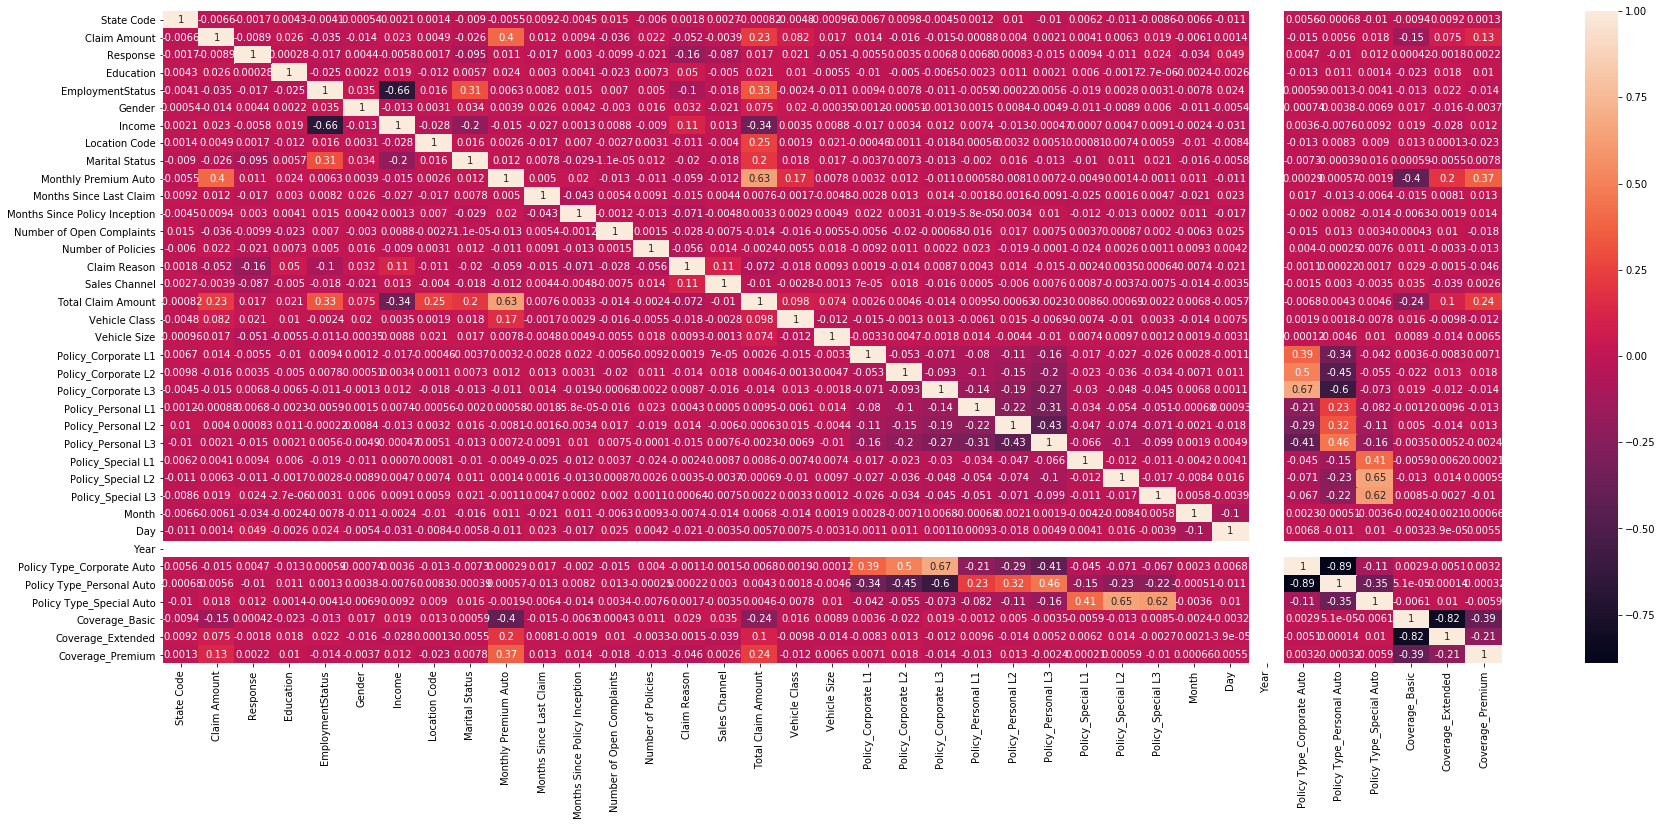

In [736]:
plt.figure(figsize=(30,12))
sns.heatmap(df.corr(),annot=True)  

In [737]:
df.isna().sum()

State Code                       0
Claim Amount                     0
Response                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Policy_Corporate L1              0
Policy_Corporate L2              0
Policy_Corporate L3              0
Policy_Personal L1               0
Policy_Personal L2               0
Policy_Personal L3               0
Policy_Special L1                0
Policy_Special L2                0
Policy_Special L3                0
Month               

# Splitting Data into Target and Input variables

In [738]:
df_x=df.drop('Claim Amount',axis=1) 
df_x.head()   

,State Code,Response,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,...,Policy_Special L3,Month,Day,Year,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,1,0,0,1,0,3322,1,1,69,32,...,0,2,24,2011,1,0,0,1,0,0
1,3,0,0,4,0,0,1,2,94,13,...,0,1,31,2011,0,1,0,0,1,0
2,4,0,0,1,0,2820,1,1,108,18,...,0,2,19,2011,0,1,0,0,0,1
3,2,0,0,4,1,0,1,1,106,18,...,0,1,20,2011,1,0,0,1,0,0
4,1,0,0,1,1,2510,0,2,73,12,...,0,2,3,2011,0,1,0,1,0,0


In [739]:
df.rename(columns = {'Claim Amount': 'Claim_Amount'}, inplace = True)  # Underscore is put as space is not accepted 

In [740]:
y=pd.DataFrame(df.Claim_Amount)
y.head() 

,Claim_Amount
0,276.351928
1,697.953590
2,1288.743165
3,764.586183
4,281.369258


In [741]:
print(df_x.shape)
print(y.shape)

(9134, 36)
(9134, 1)


In [742]:
from sklearn.preprocessing import StandardScaler         # Standard scaling input variables
sc = StandardScaler()
x = sc.fit_transform(df_x) 
x = pd.DataFrame(x,columns=df_x.columns) 
x

,State Code,Response,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,...,Policy_Special L3,Month,Day,Year,Policy Type_Corporate Auto,Policy Type_Personal Auto,Policy Type_Special Auto,Coverage_Basic,Coverage_Extended,Coverage_Premium
0,-0.550690,-0.408822,-1.124597,-0.612669,-0.980269,0.662289,0.034524,-0.188771,-0.703925,1.678099,...,-0.128336,1.075304,0.986776,0.0,1.908209,-1.701010,-0.207775,0.800278,-0.654961,-0.314893
1,0.973322,-0.408822,-1.124597,1.613313,-0.980269,-1.106490,0.034524,1.381572,0.022691,-0.208186,...,-0.128336,-0.929969,1.795716,0.0,-0.524052,0.587886,-0.207775,-1.249565,1.526809,-0.314893
2,1.735328,-0.408822,-1.124597,-0.612669,-0.980269,0.395002,0.034524,-0.188771,0.429596,0.288205,...,-0.128336,1.075304,0.408962,0.0,-0.524052,0.587886,-0.207775,-1.249565,-0.654961,3.175681
3,0.211316,-0.408822,-1.124597,1.613313,1.020128,-1.106490,0.034524,-0.188771,0.371467,0.288205,...,-0.128336,-0.929969,0.524524,0.0,1.908209,-1.701010,-0.207775,0.800278,-0.654961,-0.314893
4,-0.550690,-0.408822,-1.124597,-0.612669,1.020128,0.229945,-1.616461,1.381572,-0.587666,-0.307465,...,-0.128336,1.075304,-1.440045,0.0,-0.524052,0.587886,-0.207775,0.800278,-0.654961,-0.314893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.211316,-0.408822,-1.124597,-0.612669,1.020128,1.199526,1.685508,-0.188771,-0.587666,0.288205,...,-0.128336,1.075304,-0.631104,0.0,-0.524052,0.587886,-0.207775,0.800278,-0.654961,-0.314893
9130,0.211316,2.446054,-0.400957,-0.612669,-0.980269,-0.813114,0.034524,-1.759114,-0.413278,-0.108908,...,-0.128336,1.075304,-0.399979,0.0,1.908209,-1.701010,-0.207775,-1.249565,1.526809,-0.314893
9131,0.211316,-0.408822,-1.124597,1.613313,1.020128,-1.106490,0.034524,1.381572,-0.238891,-0.605299,...,-0.128336,1.075304,-1.093356,0.0,1.908209,-1.701010,-0.207775,-1.249565,1.526809,-0.314893
9132,0.211316,-0.408822,-0.400957,-0.612669,1.020128,-0.792881,0.034524,-0.188771,0.080820,1.876656,...,-0.128336,1.075304,-1.440045,0.0,-0.524052,0.587886,-0.207775,-1.249565,1.526809,-0.314893


In [743]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(0,201):
        x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)   
        r2_scr=r2_score(y_test,y_pred)
        print("r2 score corresponding to ",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to ",final_r_state,"is",max_r_score)
    return final_r_state         

In [744]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()                                            # Applying Linear Regression
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to  0 is 0.11844226896462784
r2 score corresponding to  1 is 0.1654572133808898
r2 score corresponding to  2 is 0.1642563515230504
r2 score corresponding to  3 is 0.1848819088086905
r2 score corresponding to  4 is 0.1548633584238116
r2 score corresponding to  5 is 0.14209330905651374
r2 score corresponding to  6 is 0.18187796358901653
r2 score corresponding to  7 is 0.19214546348228634
r2 score corresponding to  8 is 0.11931425336978385
r2 score corresponding to  9 is 0.18033351600246672
r2 score corresponding to  10 is 0.1345993051255603
r2 score corresponding to  11 is 0.1666827353238518
r2 score corresponding to  12 is 0.16558037958902994
r2 score corresponding to  13 is 0.17053873362960037
r2 score corresponding to  14 is 0.1612422304920056
r2 score corresponding to  15 is 0.15122122620547673
r2 score corresponding to  16 is 0.13928172712104847
r2 score corresponding to  17 is 0.12829984401133976
r2 score corresponding to  18 is 0.15011221736381253
r2 score c

r2 score corresponding to  155 is 0.18067838461962815
r2 score corresponding to  156 is 0.17863100735848148
r2 score corresponding to  157 is 0.15925564511314516
r2 score corresponding to  158 is 0.16799589338875476
r2 score corresponding to  159 is 0.15654574530306464
r2 score corresponding to  160 is 0.13217479948779087
r2 score corresponding to  161 is 0.1408060950465856
r2 score corresponding to  162 is 0.133820057908266
r2 score corresponding to  163 is 0.15211842781551854
r2 score corresponding to  164 is 0.14752625016393095
r2 score corresponding to  165 is 0.16535650940125546
r2 score corresponding to  166 is 0.16671754604746303
r2 score corresponding to  167 is 0.18871372979382461
r2 score corresponding to  168 is 0.1426677658972314
r2 score corresponding to  169 is 0.15954192190404803
r2 score corresponding to  170 is 0.16339663830365336
r2 score corresponding to  171 is 0.16756652529027516
r2 score corresponding to  172 is 0.15839502357375657
r2 score corresponding to  173 i

In [745]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [746]:
from xgboost import XGBRegressor 

In [747]:
xgbr=XGBRegressor()
r_state=maxr2_score(xgbr,x,y)                                            # Applying XGBoostRegressor

r2 score corresponding to  0 is 0.6572615191572855
r2 score corresponding to  1 is 0.6447195154905068
r2 score corresponding to  2 is 0.6711579944108922
r2 score corresponding to  3 is 0.6970428207340231
r2 score corresponding to  4 is 0.6752356758037292
r2 score corresponding to  5 is 0.6821862514083602
r2 score corresponding to  6 is 0.6631867069874728
r2 score corresponding to  7 is 0.6455002119561528
r2 score corresponding to  8 is 0.6689945918891822
r2 score corresponding to  9 is 0.6254426262900563
r2 score corresponding to  10 is 0.6921396529206476
r2 score corresponding to  11 is 0.6673438377559846
r2 score corresponding to  12 is 0.6701382753039615
r2 score corresponding to  13 is 0.6654560098397991
r2 score corresponding to  14 is 0.6492797562868607
r2 score corresponding to  15 is 0.6614175858011495
r2 score corresponding to  16 is 0.6894705970762525
r2 score corresponding to  17 is 0.6835980211847661
r2 score corresponding to  18 is 0.6594588392226957
r2 score corresponding

r2 score corresponding to  158 is 0.6957824752253698
r2 score corresponding to  159 is 0.6941864174573149
r2 score corresponding to  160 is 0.6472530383341104
r2 score corresponding to  161 is 0.6441120518215481
r2 score corresponding to  162 is 0.698221492260302
r2 score corresponding to  163 is 0.6765028515939933
r2 score corresponding to  164 is 0.64533029477391
r2 score corresponding to  165 is 0.696470104745436
r2 score corresponding to  166 is 0.6867201656479945
r2 score corresponding to  167 is 0.7013695345839224
r2 score corresponding to  168 is 0.6543668550401954
r2 score corresponding to  169 is 0.7029916437611115
r2 score corresponding to  170 is 0.7008252967518289
r2 score corresponding to  171 is 0.6539632666431492
r2 score corresponding to  172 is 0.6582561776190095
r2 score corresponding to  173 is 0.6594748785284223
r2 score corresponding to  174 is 0.676993696314161
r2 score corresponding to  175 is 0.6641529196650314
r2 score corresponding to  176 is 0.688300236659634

In [748]:
# Prediction of Training Dataset with the best working Model XGBRegressor which is having accuracy score 0.7084679215918368

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 36,test_size=0.20)
xgbr.fit(x_train,y_train)
y_pred = xgbr.predict(x_test)  
r2_scr=r2_score(y_test,y_pred) 
print(r2_scr) 
print(y_pred)

0.7084679215918368
[2175.3164   799.17303  452.88046 ...  515.8575   431.02933  413.94333]


In [784]:
# saving the Model with XGBoostRegressor
from sklearn.externals import joblib
joblib.dump(xgbr, 'XGBoostRegressor_Auto_Insurance_Claim_Amount.pkl')  

['XGBoostRegressor_Auto_Insurance_Claim_Amount.pkl']

# Predict the insurance fraud  in the Automobile insurance dataset

In [749]:
df1 = pd.read_csv('Automobile_Insurance_Fraud.csv')
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [750]:
df1.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [751]:
df1=df1.drop(['_c39'],axis=1)  
df1                                         # Unwanted column

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [752]:
df1 = df1.replace('\?+', np.nan, regex=True)          # replacing ? with NaN values
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,NaN,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,NaN,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [753]:
df1.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [754]:
df1 = df1.replace(np.nan, 'no info', regex=True)          # all missing values replaced with 'no info'

In [755]:
df1.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [756]:
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,no info,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,no info,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,no info,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [757]:
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,no info,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,no info,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,no info,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [758]:
df1=df1.drop(['policy_number'],axis=1)            # policy_number not required here
df1 

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,no info,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,16-07-1991,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,1,no info,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,05-01-2014,IL,100/300,1000,1436.79,0,608177,FEMALE,...,3,no info,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,17-02-2003,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [759]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   object 
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [760]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()                                                                                  #Applying Label Encoder
df1['policy_bind_date']=pd.DataFrame(lb.fit_transform(df1['policy_bind_date'])) 
df1['policy_state']=pd.DataFrame(lb.fit_transform(df1['policy_state']))
df1['policy_csl']=pd.DataFrame(lb.fit_transform(df1['policy_csl']))
df1['insured_sex']=pd.DataFrame(lb.fit_transform(df1['insured_sex']))
df1['insured_education_level']=pd.DataFrame(lb.fit_transform(df1['insured_education_level']))
df1['insured_occupation']=pd.DataFrame(lb.fit_transform(df1['insured_occupation']))
df1['insured_hobbies']=pd.DataFrame(lb.fit_transform(df1['insured_hobbies']))
df1['insured_relationship']=pd.DataFrame(lb.fit_transform(df1['insured_relationship']))
df1['incident_date']=pd.DataFrame(lb.fit_transform(df1['incident_date']))
df1['incident_type']=pd.DataFrame(lb.fit_transform(df1['incident_type']))
df1['collision_type']=pd.DataFrame(lb.fit_transform(df1['collision_type']))
df1['incident_severity']=pd.DataFrame(lb.fit_transform(df1['incident_severity']))
df1['authorities_contacted']=pd.DataFrame(lb.fit_transform(df1['authorities_contacted']))
df1['incident_state']=pd.DataFrame(lb.fit_transform(df1['incident_state']))
df1['incident_city']=pd.DataFrame(lb.fit_transform(df1['incident_city']))
df1['incident_location']=pd.DataFrame(lb.fit_transform(df1['incident_location']))
df1['property_damage']=pd.DataFrame(lb.fit_transform(df1['property_damage']))
df1['police_report_available']=pd.DataFrame(lb.fit_transform(df1['police_report_available']))
df1['auto_make']=pd.DataFrame(lb.fit_transform(df1['auto_make']))
df1['auto_model']=pd.DataFrame(lb.fit_transform(df1['auto_model']))
df1['fraud_reported']=pd.DataFrame(lb.fit_transform(df1['fraud_reported']))
df1

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,532,2,1,1000,1406.91,0,466132,1,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,487,2,2,1000,1310.80,0,431289,0,...,1,2,87200,17440,8720,61040,6,6,2006,0
996,285,41,129,0,0,1000,1436.79,0,608177,0,...,3,2,108480,18080,18080,72320,13,28,2015,0
997,130,34,509,2,1,500,1383.49,3000000,442797,0,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,573,0,2,2000,1356.92,5000000,441714,1,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [761]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_bind_date             1000 non-null   int32  
 3   policy_state                 1000 non-null   int32  
 4   policy_csl                   1000 non-null   int32  
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   int32  
 10  insured_education_level      1000 non-null   int32  
 11  insured_occupation           1000 non-null   int32  
 12  insured_hobbies              1000 non-null   int32  
 13  insured_relationshi

# Splitting into Target and Input variables

In [762]:
df_x1=df1.drop('fraud_reported',axis=1)
df_x1.head() 

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,532,2,1,1000,1406.91,0,466132,1,...,1,2,1,71610,6510,13020,52080,10,1,2004
1,228,42,821,1,1,2000,1197.22,5000000,468176,1,...,0,0,2,5070,780,780,3510,8,12,2007
2,134,29,186,2,0,2000,1413.14,5000000,430632,0,...,2,3,0,34650,7700,3850,23100,4,30,2007
3,256,41,766,0,1,2000,1415.74,6000000,608117,0,...,1,2,0,63400,6340,6340,50720,3,34,2014
4,228,44,181,0,2,1000,1583.91,6000000,610706,1,...,0,1,0,6500,1300,650,4550,0,31,2009


In [763]:
y1=pd.DataFrame(df1.fraud_reported)
y1.head() 

,fraud_reported
0,1
1,1
2,0
3,1
4,0


In [764]:
print(df_x1.shape)
print(y1.shape) 

(1000, 37)
(1000, 1)


In [765]:
from sklearn.preprocessing import StandardScaler     # Standard scaling input variables
sc = StandardScaler()
x1 = sc.fit_transform(df_x1) 
x1 = pd.DataFrame(x1,columns=df_x1.columns) 
x1

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,0.209500,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,1.076953,...,0.009759,0.461838,0.000000,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,1.259397,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,1.076953,...,-1.210174,-1.338700,1.207363,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,-1.047470,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,-0.928546,...,1.229693,1.362107,-1.207363,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,1.059589,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,-0.928546,...,0.009759,0.461838,-1.207363,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-1.065634,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,1.076953,...,-1.210174,-0.438431,-1.207363,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.103769,0.046021,1.187173,1.304542,-0.222383,0.222884,-0.479476,-0.975717,-0.928546,...,-1.210174,-0.438431,1.207363,1.305049,2.051155,0.273817,1.224309,-0.135388,-1.196528,0.149180
996,0.704407,0.224613,-1.254543,-1.220886,-1.182668,-0.222383,0.739141,-0.479476,1.492519,-0.928546,...,1.229693,1.362107,1.207363,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,1.645974
997,-0.642767,-0.541611,0.125944,1.187173,0.060937,-1.039966,0.520739,0.826998,-0.815138,-0.928546,...,1.229693,1.362107,0.000000,0.558507,0.013648,0.020826,0.771902,1.104430,-0.028570,-1.513924
998,2.208028,2.523284,0.358447,-1.220886,1.304542,1.412784,0.411866,1.697980,-0.830250,1.076953,...,-1.210174,-0.438431,0.000000,-0.219110,-0.453708,-0.451976,-0.073580,-1.375206,-1.286371,-1.181303


In [766]:
pip install xgboost 

Note: you may need to restart the kernel to use updated packages.


In [767]:
#Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [768]:
# as I got the highest accuracy score with respect to random state 65 in KNeighborsClassifier, so I fix the random state 65 for all the Models 
train_x1,test_x1,train_y1,test_y1=train_test_split(x1,y1,random_state=65,test_size=0.20)  

In [769]:
print(train_x1.shape,test_x1.shape) 

(800, 37) (200, 37)


In [770]:
print(train_y1.shape,test_y1.shape)

(800, 1) (200, 1)


In [771]:
def max_accuracy_score(clf,x1,y1):                    # finding maximum accuracy score wrt to random state
    max_acc_score=0
    for r_state in range(42,100):
        train_x1, test_x1, train_y1, test_y1 = train_test_split(x1,y1,random_state = r_state,test_size=0.20)
        clf.fit(train_x1,train_y1)
        pre = clf.predict(test_x1) 
        acc_scr=accuracy_score(test_y1,pre)
        print("accuracy score corresponding to random state ",r_state,"is",acc_scr)
        if acc_scr>max_acc_score:
            max_acc_score=acc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state,"is",max_acc_score)
    return final_r_state         

In [772]:
kn=KNeighborsClassifier(n_neighbors=15)                                # Applying KNeighbors Classifier for finding maximum accuracy score
r_state=max_accuracy_score(kn,x1,y1) 

accuracy score corresponding to random state  42 is 0.72
accuracy score corresponding to random state  43 is 0.745
accuracy score corresponding to random state  44 is 0.77
accuracy score corresponding to random state  45 is 0.75
accuracy score corresponding to random state  46 is 0.785
accuracy score corresponding to random state  47 is 0.715
accuracy score corresponding to random state  48 is 0.78
accuracy score corresponding to random state  49 is 0.805
accuracy score corresponding to random state  50 is 0.77
accuracy score corresponding to random state  51 is 0.745
accuracy score corresponding to random state  52 is 0.805
accuracy score corresponding to random state  53 is 0.735
accuracy score corresponding to random state  54 is 0.72
accuracy score corresponding to random state  55 is 0.79
accuracy score corresponding to random state  56 is 0.775
accuracy score corresponding to random state  57 is 0.73
accuracy score corresponding to random state  58 is 0.76
accuracy score correspo



Model name - KNeighborsClassifier



Accuracy_score =  0.815


Cross_Val_Score =  0.751


classification_report
               precision    recall  f1-score   support

           0       0.81      0.99      0.90       159
           1       0.83      0.12      0.21        41

    accuracy                           0.81       200
   macro avg       0.82      0.56      0.55       200
weighted avg       0.82      0.81      0.76       200



confusion matrix
 [[158   1]
 [ 36   5]]


roc_auc_score =  0.5578309556680473


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

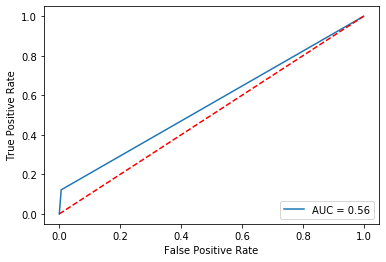

In [773]:
print('\n')
print('Model name - KNeighborsClassifier\n')
print('\n')
kn=KNeighborsClassifier(n_neighbors=15)  
kn.fit(train_x1,train_y1) 
pre=kn.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(kn, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - SupportVectorClassifier



Accuracy_score=  0.78


Cross_Val_Score =  0.7459999999999999


classification_report
               precision    recall  f1-score   support

           0       0.83      0.91      0.87       159
           1       0.44      0.27      0.33        41

    accuracy                           0.78       200
   macro avg       0.63      0.59      0.60       200
weighted avg       0.75      0.78      0.76       200



confusion matrix
 [[145  14]
 [ 30  11]]


roc_auc_score =  0.5901211842307102


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

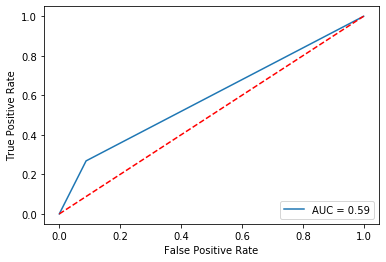

In [774]:
print('\n')
print('Model name - SupportVectorClassifier\n')
print('\n')
sv=SVC(C=10,kernel='rbf') 
sv.fit(train_x1,train_y1)
pre=sv.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS) 
print('\n')
sc = cross_val_score(sv, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - DecisionTreeClassifier



Accuracy_score=  0.805


Cross_Val_Score =  0.7820000000000001


classification_report
               precision    recall  f1-score   support

           0       0.90      0.85      0.87       159
           1       0.52      0.63      0.57        41

    accuracy                           0.81       200
   macro avg       0.71      0.74      0.72       200
weighted avg       0.82      0.81      0.81       200



confusion matrix
 [[135  24]
 [ 15  26]]


roc_auc_score =  0.7416014726184998


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

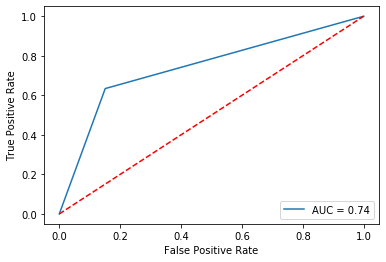

In [775]:
print('\n')
print('Model name - DecisionTreeClassifier\n')
print('\n')
dt=DecisionTreeClassifier(criterion='gini') 
dt.fit(train_x1,train_y1)
pre=dt.predict(test_x1)  
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)  
print('\n')
sc = cross_val_score(dt, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - RandomForestClassifier



Accuracy_score=  0.82


Cross_Val_Score =  0.78


classification_report
               precision    recall  f1-score   support

           0       0.84      0.95      0.89       159
           1       0.62      0.32      0.42        41

    accuracy                           0.82       200
   macro avg       0.73      0.63      0.66       200
weighted avg       0.80      0.82      0.80       200



confusion matrix
 [[151   8]
 [ 28  13]]


roc_auc_score =  0.6333793526614512


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

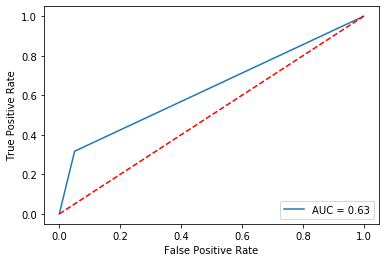

In [776]:
print('\n')
print('Model name - RandomForestClassifier\n')
print('\n')
rfc=RandomForestClassifier(criterion='gini',n_estimators=1000) 
rfc.fit(train_x1,train_y1) 
pre=rfc.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(rfc, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GradientBoostingClassifier



Accuracy_score=  0.83


Cross_Val_Score =  0.807


classification_report
               precision    recall  f1-score   support

           0       0.85      0.95      0.90       159
           1       0.65      0.37      0.47        41

    accuracy                           0.83       200
   macro avg       0.75      0.66      0.68       200
weighted avg       0.81      0.83      0.81       200



confusion matrix
 [[151   8]
 [ 26  15]]


roc_auc_score =  0.6577695965638901


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

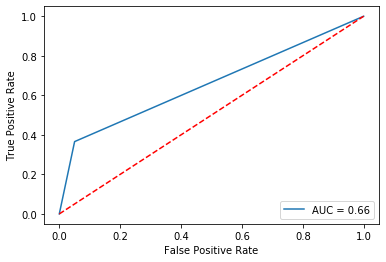

In [777]:
print('\n')
print('Model name - GradientBoostingClassifier\n')
print('\n')
gbc=GradientBoostingClassifier(learning_rate=0.001, n_estimators=900) 
gbc.fit(train_x1,train_y1)
pre=gbc.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(gbc, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - Logistic Regression



Accuracy_score=  0.84


Cross_Val_Score =  0.781


classification_report
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       159
           1       0.68      0.41      0.52        41

    accuracy                           0.84       200
   macro avg       0.77      0.68      0.71       200
weighted avg       0.83      0.84      0.82       200



confusion matrix
 [[151   8]
 [ 24  17]]


roc_auc_score =  0.6821598404663292


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

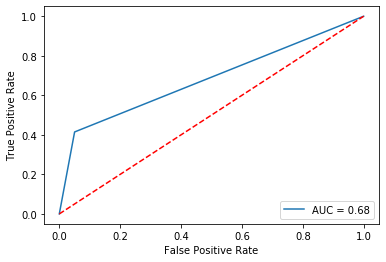

In [778]:
print('\n')
print('Model name - Logistic Regression\n')
print('\n')
lor=LogisticRegression(penalty='l2', C=15, fit_intercept=True)
lor.fit(train_x1,train_y1)
pre=lor.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(lor, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - AdaBoost Classifier



Accuracy_score=  0.82


Cross_Val_Score =  0.7729999999999999


classification_report
               precision    recall  f1-score   support

           0       0.91      0.86      0.88       159
           1       0.55      0.68      0.61        41

    accuracy                           0.82       200
   macro avg       0.73      0.77      0.75       200
weighted avg       0.84      0.82      0.83       200



confusion matrix
 [[136  23]
 [ 13  28]]


roc_auc_score =  0.7691363706089892


ROC_CURVE


Text(0.5, 0, 'False Positive Rate')

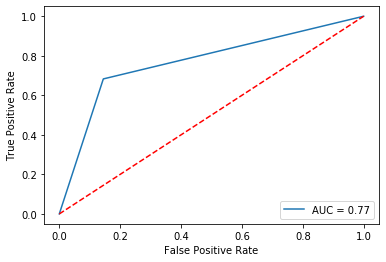

In [779]:
print('\n')
print('Model name - AdaBoost Classifier\n')
print('\n')
adc=AdaBoostClassifier(base_estimator=dt,learning_rate=0.01,n_estimators=10,algorithm='SAMME')
adc.fit(train_x1,train_y1)
pre=adc.predict(test_x1)  
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(adc, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC_CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - XGBoost Classifier



Accuracy_score=  0.875


Cross_Val_Score =  0.835


classification_report
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       159
           1       0.70      0.68      0.69        41

    accuracy                           0.88       200
   macro avg       0.81      0.80      0.81       200
weighted avg       0.87      0.88      0.87       200



confusion matrix
 [[147  12]
 [ 13  28]]


roc_auc_score =  0.8037275655775427


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

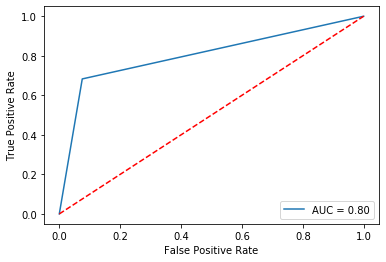

In [780]:
print('\n')
print('Model name - XGBoost Classifier\n')
print('\n')
xgb=XGBClassifier(alpha=1, max_depth=6)
xgb.fit(train_x1,train_y1)
pre=xgb.predict(test_x1) 
AS=accuracy_score(test_y1,pre)
print('Accuracy_score= ',AS)
print('\n')
sc = cross_val_score(xgb, x1, y1, cv=10, scoring='accuracy').mean() 
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n')
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



Model name - GaussianNB



Accuracy_score =  0.775


Cross_Val_Score =  0.716


classification_report
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       159
           1       0.46      0.63      0.54        41

    accuracy                           0.78       200
   macro avg       0.68      0.72      0.69       200
weighted avg       0.81      0.78      0.79       200



confusion matrix
 [[129  30]
 [ 15  26]]


roc_auc_score =  0.722733548090198


ROC-CURVE


Text(0.5, 0, 'False Positive Rate')

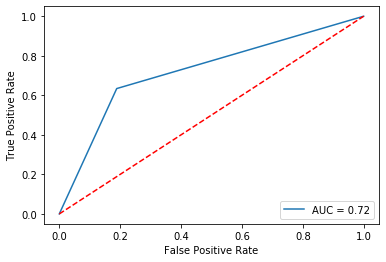

In [781]:
print('\n')
print('Model name - GaussianNB\n')
print('\n')
gnb=GaussianNB()
gnb.fit(train_x1,train_y1)
pre=gnb.predict(test_x1)
AS=accuracy_score(test_y1,pre)
print('Accuracy_score = ',AS)
print('\n')
sc = cross_val_score(gnb, x1, y1, cv=10, scoring='accuracy').mean()
print('Cross_Val_Score = ',sc)
print('\n')
print('classification_report\n',classification_report(test_y1,pre))
print('\n')
cm=confusion_matrix(test_y1,pre)
print('confusion matrix\n',cm)
print('\n')
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y1,pre)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('roc_auc_score = ',roc_auc) 
print('\n') 
print('ROC-CURVE')
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')

In [785]:
#Predicting results with XGBoostClassifier
print('\n')
print('Model name - XGBoostClassifier\n')
print('\n')
pre=xgb.predict(test_x1)
print(pre)                      



Model name - XGBoostClassifier



[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0]


In [783]:
# Here XGBClassifier is working best with an Accuracy Score of 0.875 so I am saving the Model
from sklearn.externals import joblib
joblib.dump(xgb, 'XGBoostClassifier_Auto_Insurance_Fraud_Reporting.pkl')   

['XGBoostClassifier_Auto_Insurance_Fraud_Reporting.pkl']